In [ ]:
import pandas as pd
from upsetplot import UpSet
from matplotlib import pyplot as plt


In [15]:
# Read the TSV files into DataFrames
atc = pd.read_csv("mappings/dose_era/dose_era_atc.tsv", sep="\t")
chebi = pd.read_csv("mappings/dose_era/dose_era_chebi.tsv", sep="\t")
drugbank = pd.read_csv("mappings/dose_era/dose_era_drugbank.tsv", sep="\t")

In [21]:
atc_index = atc.iloc[:,1].unique()
chebi_index = chebi.iloc[:,1].unique()
drugbank_index = drugbank.iloc[:,1].unique()

c:\Users\chris\AppData\Local\Programs\Python\Python313\Lib\site-packages\upsetplot\plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
c:\Users\chris\AppData\Local\Programs\Python\Python313\Lib\site-packages\upsetplot\plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on w

<Figure size 1000x600 with 0 Axes>

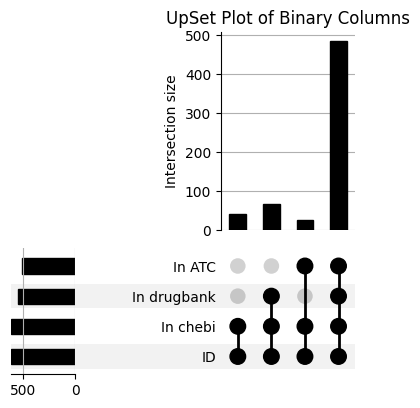

In [36]:
atc_index, chebi_index, drugbank_index = set(atc_index), set(chebi_index), set(drugbank_index)

all_index = atc_index | chebi_index | drugbank_index

upset_data = {
    'ID': list(all_index),  # Elements from the union set
    'In ATC': [1 if element in atc_index else 0 for element in all_index],  # Binary for set1
    'In chebi': [1 if element in chebi_index else 0 for element in all_index],   # Binary for set2
    'In drugbank': [1 if element in drugbank_index else 0 for element in all_index]   # Binary for set2
}

upset_data = pd.DataFrame(upset_data)

upset_binary = upset_data.astype(bool)

upset_counts = upset_binary.value_counts()

# Create and display the UpSet plot
plt.figure(figsize=(10, 6))
UpSet(upset_counts).plot()
plt.title("UpSet Plot of Binary Columns")
plt.show()